## < 실제 데이터로 pandas 라이브러리와 탐색적 분석 과정 익히기 >

#### 코로나 바이러스 데이터와 함께 pandas 라이브러리 익히기
- COVID-19-master 폴더 확인
  - 데이터 다운로드: https://github.com/CSSEGISandData/COVID-19
  - 데이터 압축 풀고 COVID-19-master 폴더를 통째로 pandas_eda 주피터 노트북이 있는 폴더 안에 하위폴더로 이동

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 1. 데이터의 출처와 주제에 대해 이해</font><br>

- 국가별 코로나 바이러스 daily 현황 자료
- Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) 에서 작성
- 데이터 소스는 https://github.com/CSSEGISandData/COVID-19/tree/master/who_covid_19_situation_reports 에 명시
  - 실제 데이터 분석에서는 raw data를 어떻게 가져왔는지에 대해서도 세세히 알필요가 있을 때가 있음
    - PDF로 만들어진 공식 문서에서 추출한 데이터와 공식 웹페이지를 크롤링해서 얻은 자료를 CSV 파일로 생성한 것으로 보임
  - 위 데이터는 테스트용 데이터이므로 출처에 대해서는 이 정도만 파악하기로 함
</div>

### 1. pandas 라이브러리로 CSV 파일 읽기
- `csv 파일`을 pandas `dataframe` 으로 읽기 위해 `read_csv()` 함수를 사용함
- csv 구분자는 quotechar=구분자 옵션을 넣어서 구분자가 다른 경우도 읽기 가능

> doc = pd.read_csv("파일명", encoding='utf-8-sig', quotechar=',')

- 에러 나는 데이터는 항상 있을 수 있음, 해당 데이터는 생략하는 것이 일반적임

> doc = pd.read_csv("파일명", encoding='utf-8-sig', error_bad_lines=False)

In [66]:
import pandas as pd
doc = pd.read_csv("00_Material(Uploaded)/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

#### **참고**: pandas 라이브러리로 엑셀 파일 읽기

- 엑셀 데이터 읽기 (맨 앞에 있는 쉬트의 데이터를 읽음)

```
pd.read_excel("파일명")
```

- 특정 쉬트 데이터 읽기: sheet_name 옵션 사용해서, 엑셀 파일의 특정 쉬트를 명시적으로 지정 가능

```
pd.read_excel(파일명, sheet_name=쉬트명)
```

<br>

<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 2. 데이터의 크기 확인</font><br>
- 보통 head(), shape, info()를 사용해 데이터의 크기를 확인함
</div>

### 1. 데이터를 pandas로 읽은 후, 가장 먼저 하는 일

- 데이터 일부 확인하기
  - `head()`: 처음 5개(디폴트)의 데이터 확인하기
    - head(n=10): 처음 10개(조정 가능)의 데이터 확인하기 
  - `tail()`: 마지막 5개의 데이터 확인하기
    - tail(n=10): 마지막 10개(조정 가능)의 데이터 확인하기 

In [71]:
doc.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-01 21:58:49,34.223334,-82.461707,4,0,0,4,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-01 21:58:49,30.295065,-92.414197,47,1,0,46,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-01 21:58:49,37.767072,-75.632346,7,0,0,7,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-01 21:58:49,43.452658,-116.241552,195,3,0,192,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-01 21:58:49,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [73]:
doc.tail() # tail은 잘 쓰지 않음

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
2517,82604.0,NaN,Wales,United Kingdom,2020-04-01 21:58:49,52.1307,-3.7837,0,198,0,0,"Wales, United Kingdom"
2518,NaN,NaN,NaN,Nauru,2020-04-01 21:58:49,-0.5228,166.9315,0,0,0,0,Nauru
2519,NaN,NaN,Niue,New Zealand,2020-04-01 21:58:49,-19.0544,-169.8672,0,0,0,0,"Niue, New Zealand"
2520,NaN,NaN,NaN,Tuvalu,2020-04-01 21:58:49,-7.1095,177.6493,0,0,0,0,Tuvalu
2521,NaN,NaN,Pitcairn Islands,United Kingdom,2020-04-01 21:58:49,-24.3768,-128.3242,0,0,0,0,"Pitcairn Islands, United Kingdom"


### 2. 보다 다양한 데이터 정보 확인하기
- `shape`: 데이터의 row, column 사이즈 확인
- `info()`: column별 데이터 타입과 실제 데이터가 있는 사이즈 확인
  - raw data는 일부 데이터가 없는 경우가 많기 때문에, 실제 데이터의 사이즈 확인이 필요함

In [76]:
doc.shape

(2522, 12)

In [78]:
doc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2522 entries, 0 to 2521
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FIPS            2175 non-null   float64
 1   Admin2          2221 non-null   object 
 2   Province_State  2338 non-null   object 
 3   Country_Region  2522 non-null   object 
 4   Last_Update     2522 non-null   object 
 5   Lat             2518 non-null   float64
 6   Long_           2518 non-null   float64
 7   Confirmed       2522 non-null   int64  
 8   Deaths          2522 non-null   int64  
 9   Recovered       2522 non-null   int64  
 10  Active          2522 non-null   int64  
 11  Combined_Key    2522 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 236.6+ KB


<div class="alert alert-block" style="border: 1px solid #FFB300;background-color:#F9FBE7;">
<font size="3em" style="font-weight:bold;color:#3f8dbf;">탐색적 데이터 분석: 3. 데이터 구성 요소(feature)의 속성(특징) 확인</font><br>
</div>

### 1. 각 column 이해하기
- raw data에는 다양한 column 이 있는 경우가 많고, 이 중에서 내가 사용할 column 에 대해서는 확실히 이해하고 있어야 함
    - `columns`로 컬럼 이름만 가져올 수 있음
- Country_Region: 국가, Lat/Long: 경도, Confirmed: 확진, Deaths: 사망, Recovered: 회복, Active: 확진 중인 사람(사망자/회복자 제외)

In [82]:
doc.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key'],
      dtype='object')

### 2. 속성이 숫자라면, 평균, 표준편차, 4분위 수, 최소/최대갑 확인하기
- `describe()`: 숫자 데이터의 기본 통계치를 한번에 확인할 수 있음

In [85]:
doc.describe()
# count: 갯수, mean: 평균, std: 표준편차, min: 최소값, max: 최대값
# 25%/50%/75%: 4분위수로 전체 데이터 중, 25%/50%/75% 각각에 해당하는 수치가 몇 인지를 알려줌

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
count,2175.000000,2518.000000,2518.000000,2522.000000,2522.000000,2522.000000,2522.000000
mean,30114.640920,35.289228,-75.615792,372.307296,20.477002,76.656622,278.524187
std,15643.080021,12.149460,47.809329,4174.952692,363.948042,1494.960160,2945.050096
min,1001.000000,-71.949900,-175.198200,0.000000,0.000000,0.000000,0.000000
25%,18052.000000,33.086811,-94.749118,2.000000,0.000000,0.000000,2.000000
50%,29031.000000,37.526763,-86.065254,7.000000,0.000000,0.000000,6.000000
75%,45024.000000,41.406878,-79.042655,34.000000,1.000000,0.000000,31.000000
max,99999.000000,71.706900,178.065000,110574.000000,13155.000000,63326.000000,80572.000000


### 3. 속성간 상관관계 이해하기
- `corr(method=상관계수)`: 각 속성간 상관 관계 확인하기 (`피어슨 상관계수가 디폴트`임)
- `피어슨 상관계수`는 선형 상관 관계를 조사하며, 일반적으로
  - +1에 가까우면, 양의 선형 상관 관계 (1에 가까울 수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값도 증가)
  - 0에 가까우면 상관관계가 없고
  - -1에 가까우면 음의 선형 상관 관계를 가진다 (-1에 가까울 수록 선에 가까운 데이터가 많고, 한 변수값이 증가하면, 다른 변수값은 감소) 라고
  해석됨
  
  
> 참고: 피어슨 상관계수 관계   <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/Correlation_coefficient.png/600px-Correlation_coefficient.png">
> 출처: [위키피디아]( https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98)

In [88]:
# 2023.05.16: 최신 pandas 버전에서는 doc.corr() 이 자동으로 문자컬럼을 제외하고, 계산해주지 않고, 에러를 냄
# 2023.05.16: 다음과 같이 numeric_only=True 옵션을 기재해줘야 함
# doc.corr()
doc.corr(numeric_only=True)

,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active
FIPS,1.000000,0.160717,0.171490,-0.000504,0.076467,NaN,0.002718
Lat,0.160717,1.000000,-0.476426,0.029389,0.026309,-0.002781,0.035631
Long_,0.171490,-0.476426,1.000000,0.141126,0.096924,0.141932,0.119737
Confirmed,-0.000504,0.029389,0.141126,1.000000,0.837153,0.727305,0.942484
Deaths,0.076467,0.026309,0.096924,0.837153,1.000000,0.546858,0.796549
Recovered,NaN,-0.002781,0.141932,0.727305,0.546858,1.000000,0.462484
Active,0.002718,0.035631,0.119737,0.942484,0.796549,0.462484,1.000000


#### **참고**: 피어슨 상관계수
- 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치로, 수치 자체를 이해하기 위해서는 공분산등 고등수학 범위를 넘어서므로, 다음과 같이 간략한 식을 참고로만 이해하기로 함
- X와 Y가 각각 n 개의 샘플을 가지고 있을 때,

$$
\text{r}_{XY} = \frac{
\sum_{i}^{n} (X_{i} -  \bar{X}) \cdot (Y_{i} -  \bar{Y})}
{\sqrt{\sum_{i}^{n} (X_{i} -  \bar{X})^2} \cdot
\sqrt{\sum_{i}^{n} (Y_{i} -  \bar{Y})^2}
}
$$

$$ \bar{X}: X 샘플의 평균, \bar{Y}: Y 샘플의 평균 $$

#### **참고**: 데이터 시각화를 통한 데이터 이해
- 데이터를 보다 깊게 이해하기 위해, 데이터를 시각화할 수 있음
- 방대한 데이터를 숫자로 보는 것보다, 눈으로 보면 보다 명확히 이해할 수 있음
- 다양한 데이터 시각화 라이브러리가 존재하므로, 이 중에서 데이터 탐색의 상관관계 분석을 위해, 바로 사용할 수 있는 라이브러리를 이해하기로 함

#### **이전 데이터 시각화 라이브러리** (참고로만 이해)
- `matplotlib`: 파이썬에서 가장 기본적으로 사용하는 자료를 그래프로 보여주는 시각화 라이브러리
  - 가장 좋기 때문에, 많이 사용된 것이 아니라, 이전부터 사용해왔기 때문에 사용된다고 하는 편이 맞음
- `seaborn`: matplotlib을 기반으로 다양한 통계 차트 및 색상 테마를 추가한 라이브러리
  - matplotlib 라이브러리로만은 이쁘지 않았고, 다양한 차트에 대한 요구가 많아서 개발된 라이브러리

#### **최신 시각화 라이브러리**: `plotly`
  - pandas 기능과 plotly 를 조합해서 최신/가장 빠르게 시각화 가능
  - pandas 데이터프레임.iplot() 같은 형태로 데이터프레임을 바로 그래프로 그릴 수 있음
  - https://plotly.com/python/
  
  
> 본 전처리에서는 이전 데이터 시각화 라이브러리를 간략히 시각화가 분석에 유용하다는 점을 알려주는 용도로 사용함 <br>
> 이전 시각화 라이브러리에 대해 가볍게만 이해할 수 있도록 꾸몄습니다. <br>
> 데이터 분석에서 시각화를 본격적으로 이해할 시에는 최신 시각화 라이브러리를 사용합니다.

**보통 다음과 같이 임포트하고 as로 변경된 이름을 사용함**

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

**주피터 노트북 상에서 그래프를 표현하기 위해 특별한 명령을 해주어야 함**

In [98]:
%matplotlib inline 

**화면에 표시될 그래프 사이즈 조정**


```
sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')
```

- data=테이블형: 데이터셋(데이터프레임)
- annot=True: 박스 안에 값 표시
- fmt='0.2f': 박스 안에 표시될 값의 표시 형식 설정 (0.2f 는 소숫점 두자릿수를 의미함)
- linewidths=0.5: 박스와 박스 사이의 간격 설정
- cmap='Blues': 색상 선택 (https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

In [101]:
plt.figure(figsize=(5,5))

<Figure size 500x500 with 0 Axes>

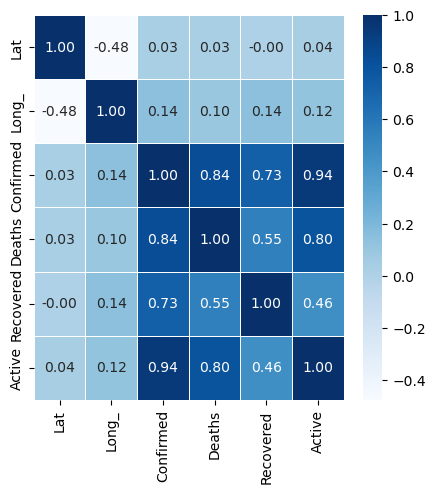

In [115]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

doc = pd.read_csv("00_Material(Uploaded)/COVID-19-master/csse_covid_19_data/csse_covid_19_daily_reports/04-01-2020.csv", encoding='utf-8-sig')

plt.figure(figsize=(5,5))

# doc.corr() 메서드는 숫자 컬럼에 대해서만 계산 가능합니다.
# 기존에는 doc.corr() 호출시, 숫자 컬럼 외에는 자동 제외를 하였으나, 최근 버전에서는 자동 제외되지 않으므로,
# 다음과 같이 숫자 컬럼만을 강제로 선택한 후, doc.corr() 을 호출하면 좋을 것 같습니다.
selected_columns = ['Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active']
doc = doc[selected_columns]
doc

sns.heatmap(data = doc.corr(), annot=True, fmt = '.2f', linewidths=0.5, cmap='Blues')

plt.show()